# Deep Learning for Scene Classification

## Introduction

Welcome to this Deep Learning project focused on scene classification. The primary objective is to build and evaluate Deep Learning models that can accurately classify images into one of the six predefined categories: Buildings, Forests, Glaciers, Mountains, Oceans, and Streets.

In this Jupyter Notebook, you'll find:

- An exploration of the dataset to better understand its structure and contents.
- Pre-processing steps, including image transforms and augmentations, tailored specifically for this dataset.
- Implementation of Deep Learning models from scratch to solve the classification problem.
- Evaluation of models using metrics like Accuracy, Precision, Recall, and F1 Score.
- Visualizations and logs that track model performance during training and validation phases.

This project is implemented locally, and Conda is used for package management, ensuring that all dependencies are correctly set up for anyone who wishes to reproduce this work.

Let's get started!


## Imports

Before diving into the code, it's important to understand the role of each library being imported. Below are the key libraries and their significance in the context of this project.

In [1]:
# PyTorch is an open-source machine learning library used for a variety of tasks,
# but primarily for training deep neural networks.
import torch

# DataLoader is a PyTorch utility for loading and batching data efficiently.
from torch.utils.data import DataLoader

# torchvision contains various utilities, pre-trained models, and datasets specifically 
# geared towards computer vision tasks.
import torchvision

# transforms are a set of common image transformations that are often required when 
# working with image data.
from torchvision import transforms

# ImageFolder is a utility for loading images directly from a directory structure where 
# each sub-directory represents a different class.
from torchvision.datasets import ImageFolder

# random_split is a utility function to randomly split a dataset into non-overlapping 
# new datasets of given lengths.
from torch.utils.data import random_split

# Matplotlib is a plotting library that is useful for visualizing data, plotting graphs, etc.
import matplotlib.pyplot as plt

# NumPy is a library for numerical operations and is especially useful for array and 
# matrix computations.
import numpy as np

# Counter is a dictionary subclass for counting hashable objects.
from collections import Counter

# PIL is a library for image processing.
from PIL import Image

# os is a Python module that provides a portable way of using operating system dependent
import os

# time is a module that provides various time-related functions.
import time

# random is a module that implements pseudo-random number generators for various distributions.
import random

# accuracy_score computes the accuracy classification score.
# confusion_matrix computes confusion matrix to evaluate the accuracy of a classification.
from sklearn.metrics import accuracy_score, confusion_matrix

## Checking CUDA Availability

In deep learning projects, it's common to leverage the power of GPUs for computation. CUDA is a parallel computing platform that allows us to use the GPU for these intensive calculations. The following code snippet checks if CUDA is available on the machine. If CUDA is available, it sets the device to "cuda"; otherwise, it falls back to using the CPU.

In [2]:
# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Print the device being used
print(f'Using device: {device}')

Using device: cuda


## Setting the Random Seed for Reproducibility

For any machine learning experiment, reproducibility is crucial. Setting a random seed ensures that the random numbers generated by our code are the same across different runs, making the results reproducible. In this project, the random seed is set for PyTorch.

In [3]:
SEED = 34
# Set the seed for generating random numbers
torch.manual_seed(SEED)
random.seed(SEED)

## Setting Hyperparameters and Other Constants

Hyperparameters are external configurations for algorithms that are not learned from the data. They are set prior to the commencement of the learning process and remain constant during training.


In [4]:
# hyperparameters

# BATCH_SIZE specifies the number of samples that will be passed through the neural network at a time.
# It impacts the optimization of the model and is an important hyperparameter to tune.
BATCH_SIZE = 32


# constants

TRAIN_DIR = 'data/train_set'
TEST_DIR = 'data/test_set'
CLASSES = os.listdir(TRAIN_DIR)
CLASSES_COUNT = len(CLASSES)


## Exploratory Data Analysis (EDA)

### Introduction

The Exploratory Data Analysis (EDA) phase is an essential step in any data science or machine learning project. The primary objective of EDA is to gain insights into the dataset, understand its complexity, and discover underlying patterns, while also identifying outliers and anomalies that could impact the performance of machine learning models. The information gathered during EDA informs feature engineering, data cleaning, and ultimately, model selection and tuning. 

This section of the documentation will walk you through various components of the EDA process. From understanding the basic statistics and quality of the data to employing visual techniques for more complex and informative insights, we'll cover it all. 

Given the image-based nature of the dataset, our EDA will be tailored towards visual data. Specific focus areas will include image size distributions, class distributions, and data quality. By the end of this section, you should have a comprehensive understanding of the data's characteristics and peculiarities, empowering you to make well-informed decisions for the subsequent phases of the project.

### Sections in this EDA:

1. **Data Overview**: Provides a snapshot of the dataset, including its size and dimensions.
2. **Visualization**: Includes various data visualizations to better understand the data's features and labels.
3. **Image Characteristics**: Examines the properties of images in the dataset.


### Data Overview

#### Introduction

In this section, we will take an initial look at the dataset to understand its basic characteristics such as size, dimensions, and type of data. Understanding the data's structure is essential for later stages where more specific analyses and modeling will take place.

#### Key Points

- **Total Number of Train Images**: Number of images in the train dataset.
- **Class Distribution**: The number of images per class.
- **Image Dimensions**: Common or range of dimensions (width x height) among the dataset images.

#### Total Number of Train Images

In [5]:
import os
total_tain_images = sum([len(files) for subdir, dirs, files in os.walk(TRAIN_DIR)])
print(f"Total number of train images: {total_tain_images}")

Total number of train images: 14034


We have a total of 14,034 images in our dataset. Given that this is an educational project, this should be more than sufficient for training a robust model. Large datasets are generally beneficial for deep learning models, providing them with more opportunities to learn nuanced features across different classes. Therefore, data scarcity is not a concern for us in this particular project.

#### Class Distribution

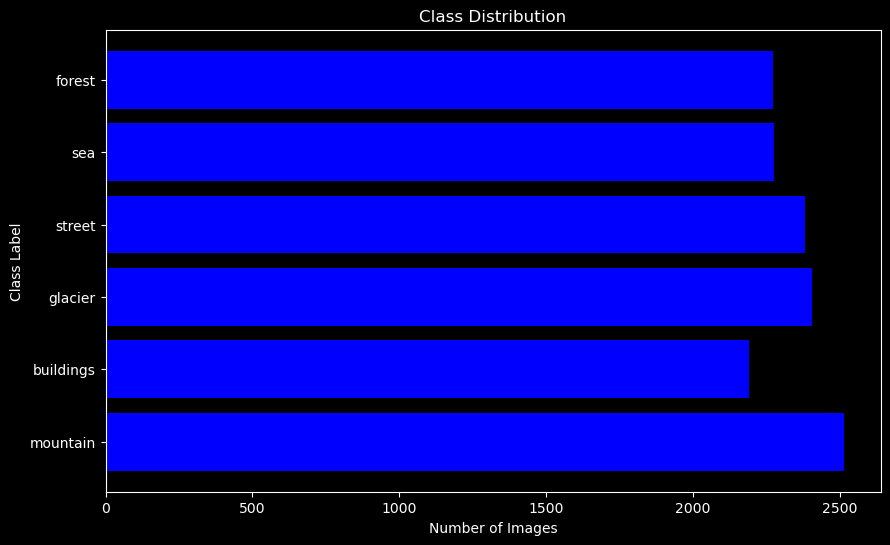

In [6]:
train_labels = os.listdir(TRAIN_DIR)
label_counter = {}
for folder in train_labels:
    folder_path = os.path.join(TRAIN_DIR, folder)
    num_files = len(os.listdir(folder_path))
    label_counter[folder] = num_files

classes = list(label_counter.keys())
count = list(label_counter.values())

plt.figure(figsize=(10, 6))
plt.barh(classes, count, color='blue')

plt.xlabel('Number of Images')
plt.ylabel('Class Label')
plt.title('Class Distribution')
plt.show()


The dataset exhibits a balanced distribution across different classes, which is advantageous for the learning process. This removes the need for techniques such as class balancing during training, simplifying the model development process.

#### Image Dimensions
In this section, we aim to explore the dimensions of the images in our dataset. Understanding the size and format of the images can provide insights into the preprocessing steps needed, as well as help in designing the architecture of the neural network.

In [7]:
image_sizes = []

for class_folder in os.listdir(TRAIN_DIR):
    class_folder_path = os.path.join(TRAIN_DIR, class_folder)
    
    if os.path.isdir(class_folder_path):
        for image_name in os.listdir(class_folder_path):
            image_path = os.path.join(class_folder_path, image_name)
            
            with Image.open(image_path) as img:
                width, height = img.size
                image_sizes.append((width, height))

# Compute some statistics
avg_size = np.mean(image_sizes, axis=0)
min_size = np.min(image_sizes, axis=0)
max_size = np.max(image_sizes, axis=0)

print(f"Average Size: {avg_size}")
print(f"Minimum Size: {min_size}")
print(f"Maximum Size: {max_size}")


Average Size: [150.         149.90872168]
Minimum Size: [150  76]
Maximum Size: [150 150]


We found that not all images have the same dimensions (150x150). Therefore, when loading the images, we will apply the corresponding transformation to standardize their size.

In [8]:
atypical_images = []

for class_folder in os.listdir(TRAIN_DIR):
    class_folder_path = os.path.join(TRAIN_DIR, class_folder)
    
    if os.path.isdir(class_folder_path):
        for image_name in os.listdir(class_folder_path):
            image_path = os.path.join(class_folder_path, image_name)
            
            with Image.open(image_path) as img:
                width, height = img.size
                if width != 150 or height != 150:
                    atypical_images.append((image_path, (width, height)))


# Display the atypical images
if atypical_images:
    print(f"Atypical image sizes found({len(atypical_images)}):")
    for img_path, size in atypical_images:
        print(f"{img_path}: {size}")
else:
    print("No atypical images found.")


Atypical image sizes found(48):
data/train_set/mountain/11873.jpg: (150, 134)
data/train_set/mountain/13656.jpg: (150, 123)
data/train_set/mountain/5171.jpg: (150, 143)
data/train_set/mountain/17021.jpg: (150, 136)
data/train_set/mountain/6057.jpg: (150, 146)
data/train_set/mountain/14575.jpg: (150, 142)
data/train_set/mountain/14462.jpg: (150, 113)
data/train_set/mountain/18823.jpg: (150, 144)
data/train_set/mountain/16041.jpg: (150, 144)
data/train_set/mountain/8163.jpg: (150, 147)
data/train_set/mountain/5371.jpg: (150, 141)
data/train_set/mountain/9286.jpg: (150, 131)
data/train_set/mountain/6633.jpg: (150, 145)
data/train_set/mountain/4513.jpg: (150, 100)
data/train_set/mountain/7400.jpg: (150, 81)
data/train_set/mountain/13200.jpg: (150, 135)
data/train_set/mountain/16971.jpg: (150, 103)
data/train_set/buildings/5358.jpg: (150, 124)
data/train_set/glacier/7512.jpg: (150, 135)
data/train_set/glacier/3148.jpg: (150, 97)
data/train_set/glacier/1010.jpg: (150, 110)
data/train_set/gla

### Visualization



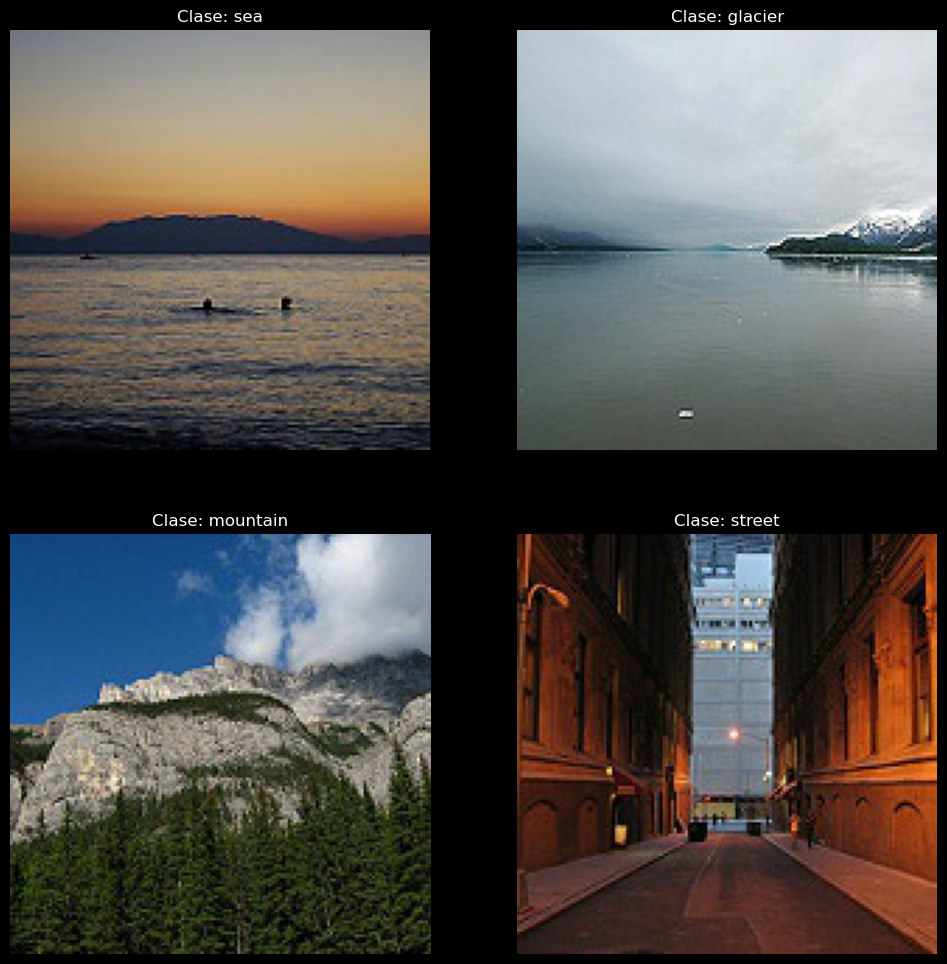

In [9]:
random_classes = random.sample(CLASSES, 4)

plt.figure(figsize=(12, 12))

for idx, random_class in enumerate(random_classes):
    # Obtener una lista de todas las imágenes en una clase específica
    img_list = os.listdir(os.path.join(TRAIN_DIR, random_class))
    
    # Seleccionar una imagen al azar de la lista
    random_img_name = random.choice(img_list)
    
    # Ruta a la imagen
    img_path = os.path.join(TRAIN_DIR, random_class, random_img_name)
    
    # Cargar la imagen
    img = Image.open(img_path)
    
    # Mostrar la imagen
    plt.subplot(2, 2, idx+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Clase: {random_class}")

plt.show()

## Data Preprocessing and Loading

In this section, we deal with the vital aspect of preparing our data. These steps can significantly influence the model's performance.

- **Data Loading**: The ImageFolder class from torchvision is used to load our dataset from the disk.
- **Transformations**: The dataset is transformed to standardize the image size and apply data augmentation techniques such as random horizontal flips and random rotations.
- **Data Splitting**: The dataset is split into training and validation sets. 80% of the data is used for training, and the remaining 20% is used for validation.
- **DataLoader**: Finally, PyTorch's DataLoader is used to create mini-batches of data, which allows for more efficient model training.

By the end of this section, we have DataLoader instances for the training, validation, and testing sets, which can be used to train and evaluate the model.

In [10]:
def get_dataloaders(train_transform, test_transform, batch_size):
    # Load the training and test datasets from disk
    train_dataset = ImageFolder("data/train_set", transform=train_transform)
    test_dataset = ImageFolder("data/test_set", transform=test_transform)

    # Split the dataset into training and validation sets
    train_size = int(0.8 * len(train_dataset))
    valid_size = len(train_dataset) - train_size
    train, validation = random_split(train_dataset, [train_size, valid_size])

    # Create DataLoader instances to load data in batches

    train_loader = DataLoader(train, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=20)
    val_loader = DataLoader(validation, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=20)
    train_all_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=20)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=20)

    return train_loader, val_loader, train_all_loader, test_loader

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CustomCNN(nn.Module):
    def __init__(self, in_channels, number_classes, device):
        super(CustomCNN, self).__init__()

        self.device = device

        self.conv1 = nn.Conv2d(in_channels, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)
        self.conv5 = nn.Conv2d(64, 120, 3, padding=1)

        self.max_pooling = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=0.5)

        # Inicializamos las capas lineales como None; las configuraremos más adelante.
        self.linear1 = None
        self.linear2 = nn.Linear(512, number_classes)

    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.relu(self.conv2(out))
        out = self.max_pooling(out)
        
        out = F.relu(self.conv3(out))
        out = F.relu(self.conv4(out))
        out = self.max_pooling(out)
        
        out = F.relu(self.conv5(out))
        out = self.max_pooling(out)

        out = self.dropout(out)

        # Aquí calculamos dinámicamente la cantidad de características antes de la capa completamente conectada.
        if self.linear1 is None:
            num_features = out.shape[1] * out.shape[2] * out.shape[3]
            self.linear1 = nn.Linear(num_features, 512).to(self.device)

        out = out.view(out.size(0), -1) # Aplana el tensor
        
        out = F.relu(self.linear1(out))
        out = self.dropout(out)
        out = self.linear2(out)

        return out


In [12]:
def train_epoch(model, loader, criterion, optim):
    model.train()
    epoch_loss = 0.0
    all_labels = []
    all_predictions = []
    
    for images, labels in loader:
      all_labels.extend(labels.numpy())  

      optim.zero_grad()

      predictions = model(images.to(device))
      all_predictions.extend(torch.argmax(predictions, dim=1).cpu().numpy())

      loss = criterion(predictions, labels.to(device))
      
      loss.backward()
      optim.step()

      epoch_loss += loss.item()

    return epoch_loss / len(loader), accuracy_score(all_labels, all_predictions) * 100


def validation_epoch(model, loader, criterion):
    model.eval()
    epoch_loss = 0.0
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():
      for images, labels in loader:
        all_labels.extend(labels.numpy())  

        predictions = model(images.to(device))
        all_predictions.extend(torch.argmax(predictions, dim=1).cpu().numpy())

        loss = criterion(predictions, labels.to(device))

        epoch_loss += loss.item()

    return epoch_loss / len(loader), accuracy_score(all_labels, all_predictions) * 100
  

def train_model(model, train_loader, test_loader, criterion, optim, number_epochs, patience = 30):
  train_history = []
  test_history = []
  accuracy_history = []
  best_val_loss = float('inf')

  for epoch in range(number_epochs):
      

      # Train the model for one epoch
      start_time = time.time()
      train_loss, train_acc = train_epoch(model, train_loader, criterion, optim)
      train_history.append(train_loss)
      print("Training epoch {} | Loss {:.6f} | Accuracy {:.2f}% | Time {:.2f} seconds"
            .format(epoch + 1, train_loss, train_acc, time.time() - start_time))

      # Evaluate the model on the test set / validation set
      start_time = time.time()
      test_loss, acc = validation_epoch(model, test_loader, criterion)
      test_history.append(test_loss)
      accuracy_history.append(acc)
      print("Validation epoch {} | Loss {:.6f} | Accuracy {:.2f}% | Time {:.2f} seconds"
            .format(epoch + 1, test_loss, acc, time.time() - start_time))
      
      # early stopping: if the validation loss does not decrease for 10 consecutive epochs, stop training
      if test_loss < best_val_loss:
          best_val_loss = test_loss
          counter = 0  # Restablecer el contador
      else:
          counter += 1  # Incrementar el contador
          if counter >= patience:
              print('Early stopping')
              break

In [13]:
# Global models config

BATCH_SIZE = 50
LR = 0.001
NUMBER_EPOCHS = 500
criterion = nn.CrossEntropyLoss().to(device)

In [14]:
# # Fijamos las semillas siempre para poder comparar.

# torch.manual_seed(42)
# torch.backends.cudnn.deterministic = True
# torch.backends.cudnn.benchmark = False

# # Create transforms for data augmentation and normalization
# train_transform = transforms.Compose([
#     transforms.Resize((84, 84)),
#     transforms.RandomHorizontalFlip(p=0.3),  # Flip the image horizontally with probability 20%
#     transforms.ToTensor(),  # Convert PIL Image to PyTorch tensor
# ])

# test_transform = transforms.Compose([
#     transforms.Resize((84, 84)),
#     transforms.ToTensor(),  # Convert PIL Image to PyTorch tensor
# ])

# train_loader, valid_loader,  train_all_loader, test_loader = get_dataloaders(train_transform, test_transform, BATCH_SIZE)

# # Definimos el modelo y el optimizador
# model = CustomCNN(3, CLASSES_COUNT,device).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=LR)

# # Entrenamos
# train_model(model, train_loader, valid_loader, criterion, optimizer, NUMBER_EPOCHS)

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class DenseBlock(nn.Module):
    def __init__(self, in_channels, growth_rate):
        super(DenseBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, growth_rate, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels + growth_rate, growth_rate, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(in_channels + 2*growth_rate, growth_rate, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(in_channels + 3*growth_rate, growth_rate, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        x1 = F.relu(self.conv1(x))
        x2 = F.relu(self.conv2(torch.cat([x, x1], dim=1)))
        x3 = F.relu(self.conv3(torch.cat([x, x1, x2], dim=1)))
        x4 = F.relu(self.conv4(torch.cat([x, x1, x2, x3], dim=1)))
        return torch.cat([x, x1, x2, x3, x4], dim=1)

class TransitionLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(TransitionLayer, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)
        self.pool = nn.AvgPool2d(kernel_size=2, stride=2)

    def forward(self, x):
        x = self.conv(x)
        x = self.pool(x)
        return x

class DenseNet(nn.Module):
    def __init__(self, num_classes=10):
        super(DenseNet, self).__init__()
        self.init_conv = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.init_pool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.block1 = DenseBlock(64, 32)  # Salida: 64 + 32*4 = 192
        self.trans1 = TransitionLayer(192, 96)  # Salida: 96

        self.block2 = DenseBlock(96, 32)  # Salida: 96 + 32*4 = 224
        self.trans2 = TransitionLayer(224, 112)  # Salida: 112

        self.block3 = DenseBlock(112, 32)  # Salida: 112 + 32*4 = 240
        self.trans3 = TransitionLayer(240, 120)  # Salida: 120

        self.block4 = DenseBlock(120, 32)  # Salida: 120 + 32*4 = 248

        self.fc = nn.Linear(248, num_classes)

    def forward(self, x):
        x = self.init_conv(x)
        x = self.init_pool(x)

        x = self.block1(x)
        x = self.trans1(x)

        x = self.block2(x)
        x = self.trans2(x)

        x = self.block3(x)
        x = self.trans3(x)

        x = self.block4(x)

        x = F.adaptive_avg_pool2d(x, (1, 1))
        x = x.view(x.size(0), -1)

        x = self.fc(x)
        return x


In [16]:
BATCH_SIZE = 100
LR = 0.0005
NUMBER_EPOCHS = 200
criterion = nn.CrossEntropyLoss().to(device)

torch.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

# Creamos los datasets
test_transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=1)
])

train_transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.RandomHorizontalFlip(p=0.3),
    transforms.RandomVerticalFlip(p=0.3),
    transforms.RandomRotation(10),

    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=1)
])

model = DenseNet(num_classes =CLASSES_COUNT).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

train_loader, valid_loader, train_all_loader, test_loader = get_dataloaders(train_transform, test_transform, BATCH_SIZE)

train_model(model, train_loader, valid_loader, criterion, optimizer, NUMBER_EPOCHS, 30)

Training epoch 1 | Loss 1.315728 | Accuracy 45.57% | Time 4.14 seconds
Validation epoch 1 | Loss 1.144749 | Accuracy 53.79% | Time 0.70 seconds
Training epoch 2 | Loss 1.007164 | Accuracy 59.41% | Time 3.55 seconds
Validation epoch 2 | Loss 0.975557 | Accuracy 60.46% | Time 0.67 seconds
Training epoch 3 | Loss 0.898594 | Accuracy 64.71% | Time 3.56 seconds
Validation epoch 3 | Loss 0.857784 | Accuracy 65.48% | Time 0.68 seconds
Training epoch 4 | Loss 0.854424 | Accuracy 67.04% | Time 3.56 seconds
Validation epoch 4 | Loss 0.838060 | Accuracy 68.72% | Time 0.60 seconds
Training epoch 5 | Loss 0.773358 | Accuracy 70.32% | Time 3.47 seconds
Validation epoch 5 | Loss 0.723824 | Accuracy 71.93% | Time 0.67 seconds
Training epoch 6 | Loss 0.734178 | Accuracy 72.74% | Time 3.54 seconds
Validation epoch 6 | Loss 0.820969 | Accuracy 69.90% | Time 0.67 seconds
Training epoch 7 | Loss 0.672952 | Accuracy 75.07% | Time 3.48 seconds
Validation epoch 7 | Loss 0.762241 | Accuracy 71.54% | Time 0.64 